In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving C MAPSS DATA.csv to C MAPSS DATA.csv



📊 Cross-validation results (Train vs Validation):


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Accuracy - Train: 0.878, Validation: 0.878
Precision - Train: 0.532, Validation: 0.532
Recall - Train: 0.898, Validation: 0.898
F1 - Train: 0.668, Validation: 0.668
Roc_auc - Train: 0.954, Validation: 0.954


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


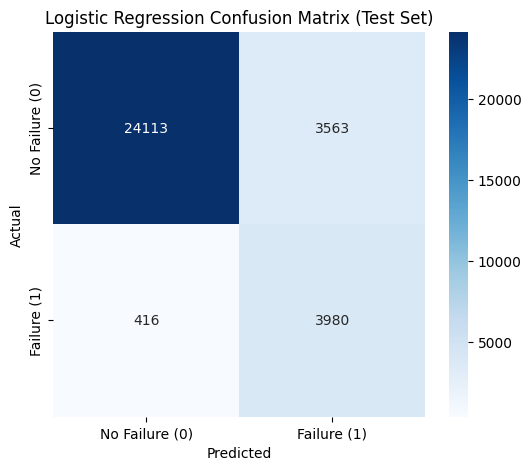


📝 Classification Report (Test Set):
                precision    recall  f1-score   support

No Failure (0)       0.98      0.87      0.92     27676
   Failure (1)       0.53      0.91      0.67      4396

      accuracy                           0.88     32072
     macro avg       0.76      0.89      0.80     32072
  weighted avg       0.92      0.88      0.89     32072



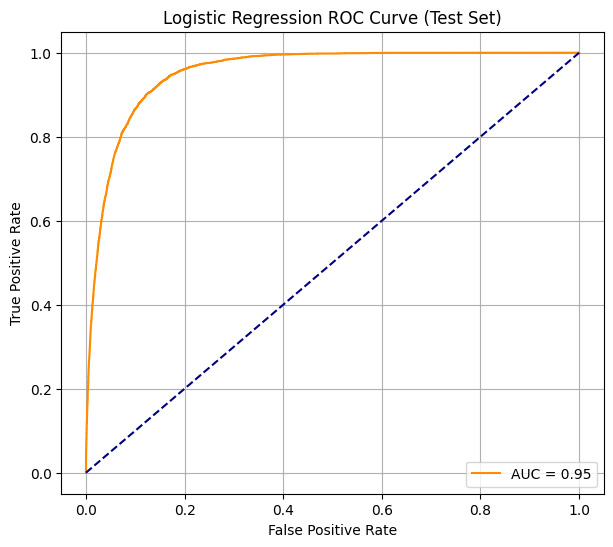

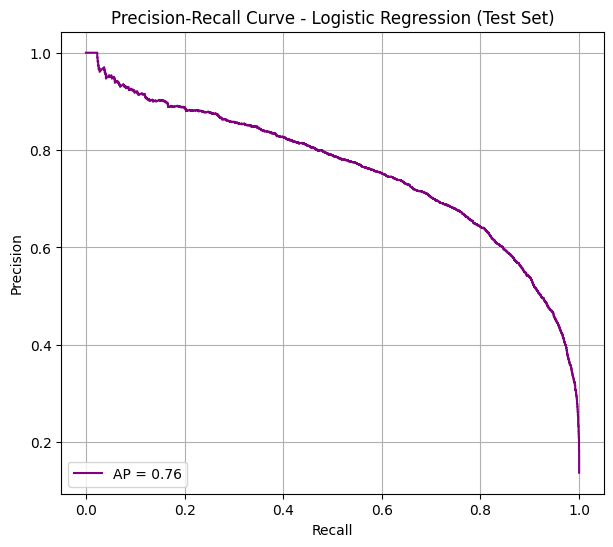

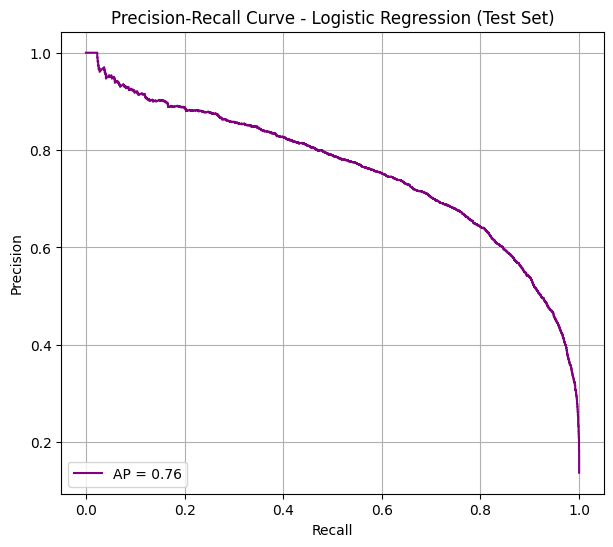

In [ ]:
#STEP 1: Installing required libraries
!pip install imbalanced-learn xgboost --quiet

#STEP 2: Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

pipeline = Pipeline([
    ('sampler', RandomOverSampler(random_state=42)),
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression(max_iter=1000, random_state=42))
])
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler
import matplotlib.pyplot as plt
import seaborn as sns


# STEP 4: Load your dataset
df = pd.read_csv('C MAPSS DATA.csv')

df = pd.get_dummies(df, columns=['dataset'])  # Converts 'dataset' to dataset_FD001, etc.

# Option 2: (If you prefer) you can drop it entirely:
# df = df.drop(columns=['dataset'], errors='ignore')

# STEP 5: Dropping other non-feature columns if present
df = df.drop(columns=['unit_number', 'RUL'], errors='ignore')

# STEP 6: Defining features and target
X = df.drop(columns=['Failure'])
y = df['Failure']

# STEP 7: Stratified Train/Test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42)

# STEP 8: Define pipeline for Logistic Regression
pipeline = Pipeline([
    ('sampler', RandomOverSampler(random_state=42)),
    ('classifier', LogisticRegression(max_iter=1000, random_state=42))
])

# STEP 9: Cross-validation with StratifiedKFold
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

print("\n Cross-validation results (Train vs Validation):")
results = cross_validate(pipeline, X_train, y_train,
                         cv=cv, scoring=scoring,
                         return_train_score=True)

for metric in scoring:
    train_score = results[f'train_{metric}'].mean()
    val_score = results[f'test_{metric}'].mean()
    print(f"{metric.capitalize()} - Train: {train_score:.3f}, Validation: {val_score:.3f}")

# STEP 11: Final fit and test set evaluation
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
y_prob = pipeline.predict_proba(X_test)[:, 1]

# Confusion Matrix
class_names = ['No Failure (0)', 'Failure (1)']
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.title('Logistic Regression Confusion Matrix (Test Set)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification Report
print("\n Classification Report (Test Set):")
print(classification_report(y_test, y_pred, target_names=class_names))

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(7, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}', color='darkorange')
plt.plot([0, 1], [0, 1], linestyle='--', color='navy')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve (Test Set)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()
# Precision-Recall Curve
from sklearn.metrics import precision_recall_curve, average_precision_score

precision, recall, _ = precision_recall_curve(y_test, y_prob)
ap_score = average_precision_score(y_test, y_prob)

plt.figure(figsize=(7, 6))
plt.plot(recall, precision, label=f'AP = {ap_score:.2f}', color='purple')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Logistic Regression (Test Set)')
plt.grid(True)
plt.legend(loc='lower left')
plt.show()
# Precision-Recall Curve
from sklearn.metrics import precision_recall_curve, average_precision_score

precision, recall, _ = precision_recall_curve(y_test, y_prob)
ap_score = average_precision_score(y_test, y_prob)

plt.figure(figsize=(7, 6))
plt.plot(recall, precision, label=f'AP = {ap_score:.2f}', color='purple')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Logistic Regression (Test Set)')
plt.grid(True)
plt.legend(loc='lower left')
plt.show()



In [ ]:
#STEP 1: Upload the dataset
from google.colab import files
uploaded = files.upload()


Saving C MAPSS DATA.csv to C MAPSS DATA (1).csv


In [ ]:
# ✅ STEP 2: Load the dataset into a DataFrame
import pandas as pd

# Replace this with the actual uploaded file name
df = pd.read_csv('C MAPSS DATA.csv')

# Preview the data
df.head()


,unit_number,time_in_cycles,operational_setting_1,operational_setting_2,operational_setting_3,sensor_measurement_1,sensor_measurement_2,sensor_measurement_3,sensor_measurement_4,sensor_measurement_5,...,sensor_measurement_15,sensor_measurement_16,sensor_measurement_17,sensor_measurement_18,sensor_measurement_19,sensor_measurement_20,sensor_measurement_21,dataset,RUL,Failure
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,8.4195,0.03,392.0,2388.0,100.0,39.06,23.4190,FD001,191,0
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,8.4318,0.03,392.0,2388.0,100.0,39.00,23.4236,FD001,190,0
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,8.4178,0.03,390.0,2388.0,100.0,38.95,23.3442,FD001,189,0
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,8.3682,0.03,392.0,2388.0,100.0,38.88,23.3739,FD001,188,0
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,8.4294,0.03,393.0,2388.0,100.0,38.90,23.4044,FD001,187,0


In [ ]:
# STEP 3: Import libraries and prepare preprocessing tools
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_validate
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    confusion_matrix, classification_report,
    roc_curve, auc, precision_recall_curve, average_precision_score
)
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# STEP 4: Clean and prepare data

# If 'dataset' is a column (e.g., FD001, FD002), one-hot encode it
if 'dataset' in df.columns:
    df = pd.get_dummies(df, columns=['dataset'])

# Drop unnecessary columns
df = df.drop(columns=['unit_number', 'RUL'], errors='ignore')

# Define features and target
X = df.drop(columns=['Failure'])
y = df['Failure']

# Train-test split with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42)


In [ ]:
# STEP 5: Create and train XGBoost pipeline
pipeline = Pipeline([
    ('sampler', RandomOverSampler(random_state=42)),
    ('scaler', StandardScaler()),
    ('classifier', XGBClassifier(
        use_label_encoder=False,
        eval_metric='logloss',
        random_state=42,
        n_jobs=-1
    ))
])

# Cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

# Evaluate with cross-validation
results = cross_validate(pipeline, X_train, y_train,
                         cv=cv, scoring=scoring,
                         return_train_score=True)

print("\n📊 XGBoost - Cross-Validation Results:")
for metric in scoring:
    train_score = results[f'train_{metric}'].mean()
    val_score = results[f'test_{metric}'].mean()
    print(f"{metric.capitalize()} - Train: {train_score:.3f}, Validation: {val_score:.3f}")


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [10:02:12] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [10:02:23] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [10:02:28] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [10:02:34] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [10:02:38] WARNING: /w


📊 XGBoost - Cross-Validation Results:
Accuracy - Train: 0.970, Validation: 0.954
Precision - Train: 0.824, Validation: 0.774
Recall - Train: 0.989, Validation: 0.942
F1 - Train: 0.899, Validation: 0.850
Roc_auc - Train: 0.997, Validation: 0.991


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [10:02:54] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


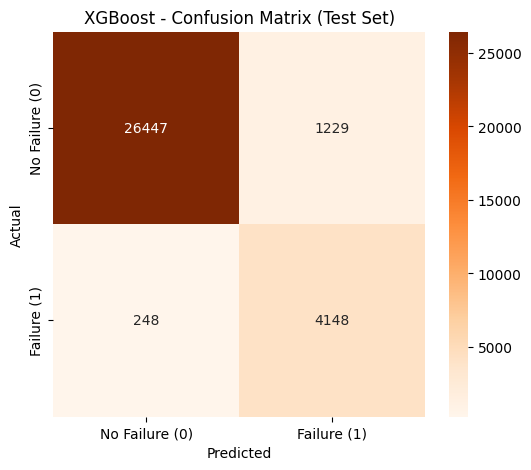


📝 Classification Report (Test Set):
                precision    recall  f1-score   support

No Failure (0)       0.99      0.96      0.97     27676
   Failure (1)       0.77      0.94      0.85      4396

      accuracy                           0.95     32072
     macro avg       0.88      0.95      0.91     32072
  weighted avg       0.96      0.95      0.96     32072



In [ ]:
# STEP 6: Fit final model and evaluate on test set
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
y_prob = pipeline.predict_proba(X_test)[:, 1]

# Confusion Matrix
class_names = ['No Failure (0)', 'Failure (1)']
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges',
            xticklabels=class_names, yticklabels=class_names)
plt.title('XGBoost - Confusion Matrix (Test Set)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification Report
print("\n Classification Report (Test Set):")
print(classification_report(y_test, y_pred, target_names=class_names))


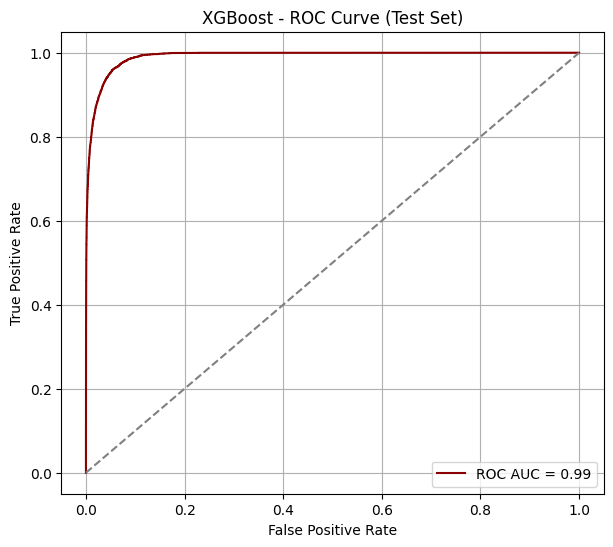

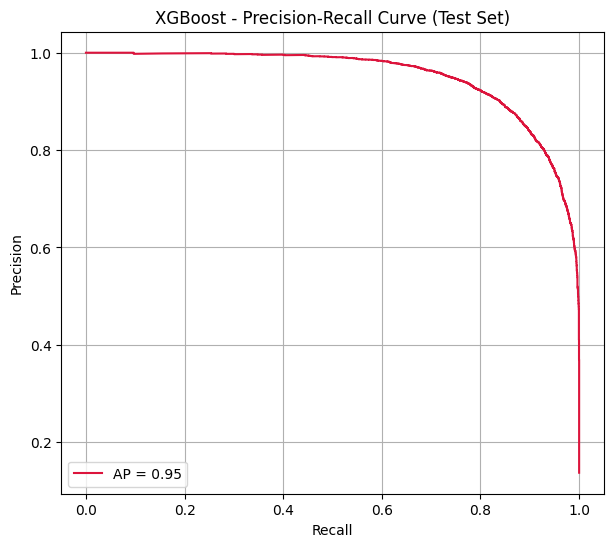

In [ ]:
# STEP 7: ROC and PR curves
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(7, 6))
plt.plot(fpr, tpr, label=f'ROC AUC = {roc_auc:.2f}', color='darkred')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XGBoost - ROC Curve (Test Set)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_prob)
ap_score = average_precision_score(y_test, y_prob)

plt.figure(figsize=(7, 6))
plt.plot(recall, precision, label=f'AP = {ap_score:.2f}', color='crimson')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('XGBoost - Precision-Recall Curve (Test Set)')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()


In [ ]:
# Get the trained XGBoost model from the pipeline
xgb_model = pipeline.named_steps['classifier']


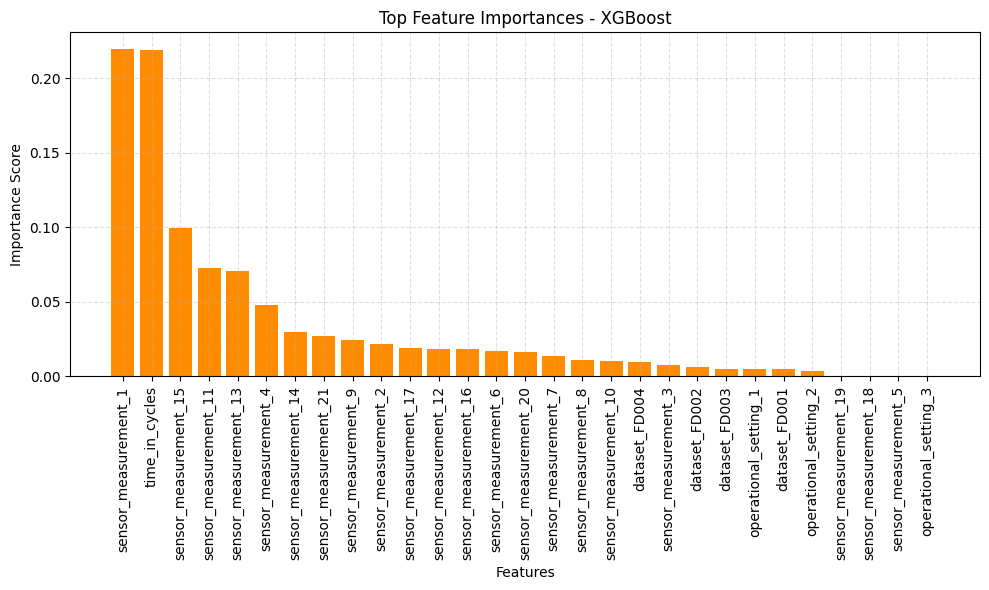

In [ ]:
# Create a bar chart of feature importances
importances = xgb_model.feature_importances_
feature_names = X.columns

# Sort by importance
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Top Feature Importances - XGBoost")
plt.bar(range(len(importances)), importances[indices], align="center", color='darkorange')
plt.xticks(range(len(importances)), feature_names[indices], rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.tight_layout()
plt.grid(True, linestyle='--', alpha=0.4)
plt.show()


Fitting 5 folds for each of 12 candidates, totalling 60 fits

✅ Best Hyperparameters:
{'classifier__max_depth': 20, 'classifier__min_samples_leaf': 10, 'classifier__min_samples_split': 5}

📊 Decision Tree - Cross-Validation Results:
Accuracy   - Train: 0.972, Validation: 0.944
Precision  - Train: 0.845, Validation: 0.755
Recall     - Train: 0.978, Validation: 0.872
F1         - Train: 0.907, Validation: 0.809
Roc_auc    - Train: 0.998, Validation: 0.946

📝 Classification Report (Test Set):
                precision    recall  f1-score   support

No Failure (0)       0.98      0.96      0.97     27676
   Failure (1)       0.76      0.88      0.81      4396

      accuracy                           0.94     32072
     macro avg       0.87      0.92      0.89     32072
  weighted avg       0.95      0.94      0.95     32072



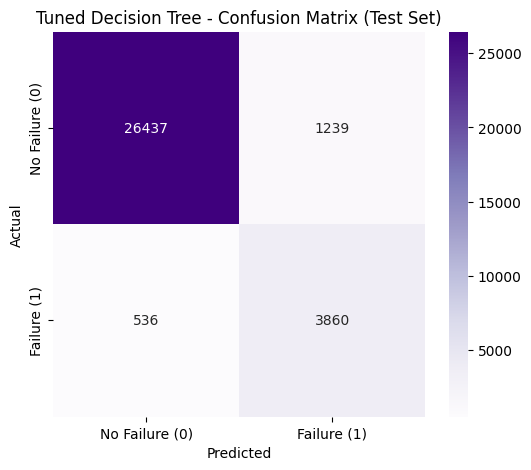

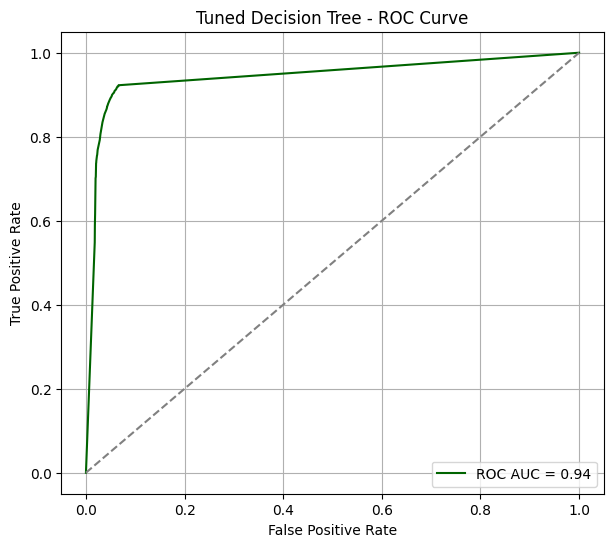

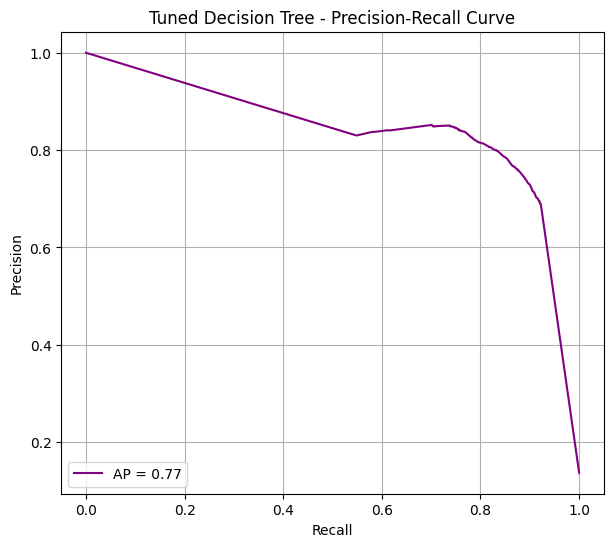

In [ ]:
# Install necessary libraries
!pip install imbalanced-learn xgboost --quiet

# Imports
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, cross_validate
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    confusion_matrix, classification_report,
    roc_curve, auc, precision_recall_curve, average_precision_score
)
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare data
if 'dataset' in df.columns:
    df = pd.get_dummies(df, columns=['dataset'])

df = df.drop(columns=['unit_number', 'RUL'], errors='ignore')
X = df.drop(columns=['Failure'])
y = df['Failure']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42)

# Create pipeline
pipeline = Pipeline([
    ('sampler', RandomOverSampler(random_state=42)),
    ('scaler', StandardScaler()),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

#  Hyperparameter grid
param_grid = {
    'classifier__max_depth': [10, 15, 20],
    'classifier__min_samples_split': [5, 10],
    'classifier__min_samples_leaf': [5, 10]
}

# GridSearchCV (for F1)
grid_search = GridSearchCV(
    pipeline,
    param_grid=param_grid,
    scoring='f1',
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
    verbose=1,
    n_jobs=-1
)

# Fit
grid_search.fit(X_train, y_train)
print("\n Best Hyperparameters:")
print(grid_search.best_params_)

# Extract best model
best_pipeline = grid_search.best_estimator_

# Re-run cross-validation with all metrics
scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

cv_results = cross_validate(
    best_pipeline,
    X_train,
    y_train,
    scoring=scoring,
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
    return_train_score=True
)

#  Print metrics
print("\n Decision Tree - Cross-Validation Results:")
for metric in scoring:
    train_score = np.mean(cv_results[f'train_{metric}'])
    val_score = np.mean(cv_results[f'test_{metric}'])
    print(f"{metric.capitalize():<10} - Train: {train_score:.3f}, Validation: {val_score:.3f}")

#  Evaluate on test set
best_pipeline.fit(X_train, y_train)
y_pred = best_pipeline.predict(X_test)
y_prob = best_pipeline.predict_proba(X_test)[:, 1]

#  Classification Report
class_names = ['No Failure (0)', 'Failure (1)']
print("\n Classification Report (Test Set):")
print(classification_report(y_test, y_pred, target_names=class_names))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples',
            xticklabels=class_names, yticklabels=class_names)
plt.title('Tuned Decision Tree - Confusion Matrix (Test Set)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(7, 6))
plt.plot(fpr, tpr, label=f'ROC AUC = {roc_auc:.2f}', color='darkgreen')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Tuned Decision Tree - ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_prob)
ap_score = average_precision_score(y_test, y_prob)
plt.figure(figsize=(7, 6))
plt.plot(recall, precision, label=f'AP = {ap_score:.2f}', color='purple')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Tuned Decision Tree - Precision-Recall Curve')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()


Fitting 5 folds for each of 16 candidates, totalling 80 fits
✅ Best Hyperparameters:
{'classifier__max_depth': 20, 'classifier__min_samples_leaf': 2, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 100}

📊 Random Forest - Cross-Validation Results:
Accuracy   - Train: 0.993, Validation: 0.961
Precision  - Train: 0.950, Validation: 0.829
Recall     - Train: 1.000, Validation: 0.904
F1         - Train: 0.974, Validation: 0.865
Roc_auc    - Train: 1.000, Validation: 0.990

📝 Classification Report (Test Set):
                precision    recall  f1-score   support

No Failure (0)       0.98      0.97      0.98     27676
   Failure (1)       0.82      0.90      0.86      4396

      accuracy                           0.96     32072
     macro avg       0.90      0.93      0.92     32072
  weighted avg       0.96      0.96      0.96     32072



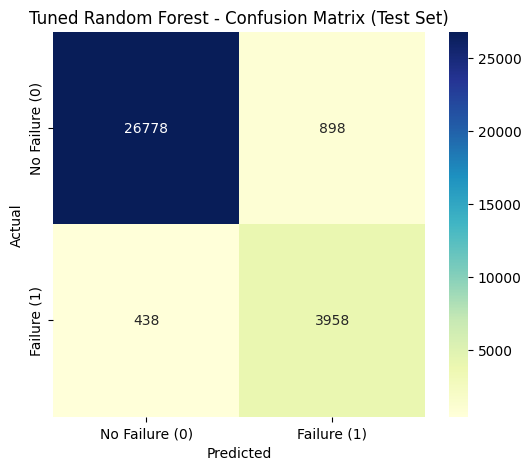

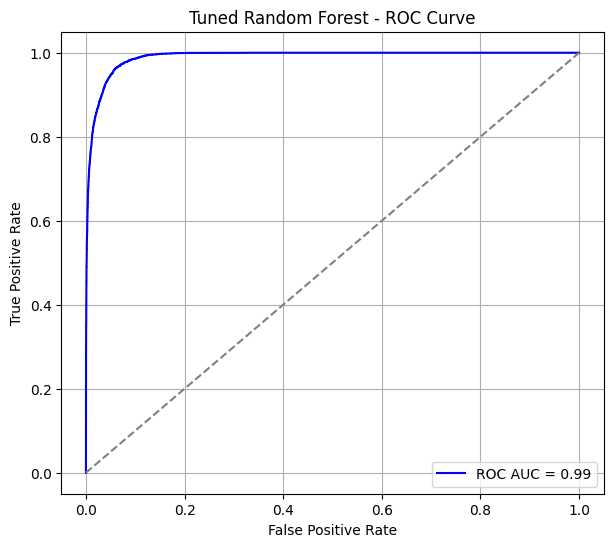

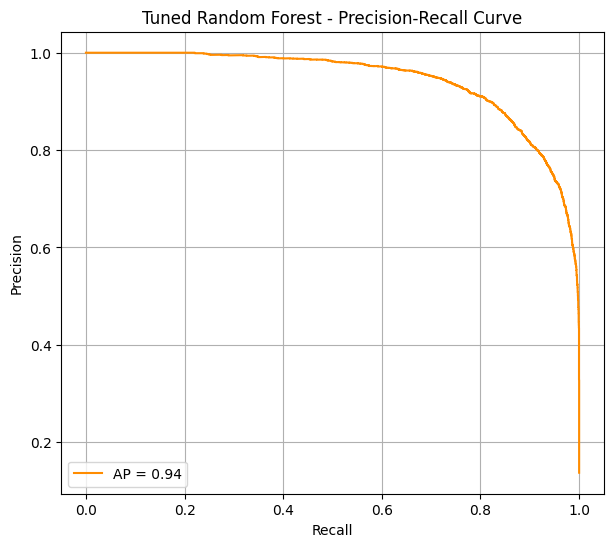

In [ ]:


# Imports
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, cross_validate
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    confusion_matrix, classification_report,
    roc_curve, auc, precision_recall_curve, average_precision_score
)
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare your data
if 'dataset' in df.columns:
    df = pd.get_dummies(df, columns=['dataset'])

df = df.drop(columns=['unit_number', 'RUL'], errors='ignore')

X = df.drop(columns=['Failure'])
y = df['Failure']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42)

# Define the pipeline
pipeline = Pipeline([
    ('sampler', RandomOverSampler(random_state=42)),
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier(random_state=42, n_jobs=-1))
])

# Define hyperparameter grid
param_grid = {
    'classifier__n_estimators': [100, 200],
    'classifier__max_depth': [10, 20],
    'classifier__min_samples_split': [5, 10],
    'classifier__min_samples_leaf': [2, 5]
}

# Run GridSearchCV
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    scoring='f1',
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
    verbose=1,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

print(" Best Hyperparameters:")
print(grid_search.best_params_)

#  Cross-validation scores using best estimator
best_pipeline = grid_search.best_estimator_

scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']
cv_results = cross_validate(
    best_pipeline,
    X_train,
    y_train,
    scoring=scoring,
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
    return_train_score=True
)

print("\n📊 Random Forest - Cross-Validation Results:")
for metric in scoring:
    train_score = np.mean(cv_results[f'train_{metric}'])
    val_score = np.mean(cv_results[f'test_{metric}'])
    print(f"{metric.capitalize():<10} - Train: {train_score:.3f}, Validation: {val_score:.3f}")

# Fit best model on training set and predict on test set
best_pipeline.fit(X_train, y_train)
y_pred = best_pipeline.predict(X_test)
y_prob = best_pipeline.predict_proba(X_test)[:, 1]

# Classification Report
class_names = ['No Failure (0)', 'Failure (1)']
print("\n Classification Report (Test Set):")
print(classification_report(y_test, y_pred, target_names=class_names))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu',
            xticklabels=class_names, yticklabels=class_names)
plt.title('Tuned Random Forest - Confusion Matrix (Test Set)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(7, 6))
plt.plot(fpr, tpr, label=f'ROC AUC = {roc_auc:.2f}', color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Tuned Random Forest - ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_prob)
ap_score = average_precision_score(y_test, y_prob)
plt.figure(figsize=(7, 6))
plt.plot(recall, precision, label=f'AP = {ap_score:.2f}', color='darkorange')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Tuned Random Forest - Precision-Recall Curve')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()
